In [324]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [112]:
df = pd.read_csv('ninjavan_thailand.csv')
#only keep caption column 
df1 = df[['caption']]
df1 = df1.dropna()

In [113]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [180]:
df1['reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['reviews']
    if review == '0':
        df1['reviews'][i] = review.replace('0', row['caption'])

In [181]:
df1 = df1.rename(columns={'reviews': 'Ninjavan TH Reviews'})
df1

,index,caption,middle,Ninjavan TH Reviews
0,0,(Translated by Google) Thank you very much (O...,Thank you very much (Original,Thank you very much
1,2,Always wrong delivery!!! How do you even trai...,NaN,Always wrong delivery!!! How do you even trai...
2,3,(Translated by Google) The delivery man is ver...,The delivery man is very bad. It's the worst ...,The delivery man is very bad. It's the worst ...
3,4,(Translated by Google) Please call the recipie...,Please call the recipient and send it to the ...,Please call the recipient and send it to the ...
4,5,(Translated by Google) I don't know what other...,"I don't know what other people's are, but min...","I don't know what other people's are, but min..."
...,...,...,...,...
494,922,(Translated by Google) Terrible staff Delivery...,Terrible staff Delivery of the front of the h...,Terrible staff Delivery of the front of the h...
495,923,(Translated by Google) Wait until the product ...,Wait until the product has been designated da...,Wait until the product has been designated da...
496,925,(Translated by Google) Good. Fast delivery. St...,Good. Fast delivery. Staff speak politely. (...,Good. Fast delivery. Staff speak politely.
497,928,(Translated by Google) Fast delivery and knowi...,Fast delivery and knowing the route. Reliable...,Fast delivery and knowing the route. Reliable.


In [182]:
df1['Ninjavan TH Reviews'].to_csv('ninjavanth1.csv')

### Run 2nd csv

In [184]:
df2 = pd.read_csv('ninjaxpress_batam.csv')

In [186]:
df2 = df2[['caption']]

df2 = df2.dropna()

df2['middle'] = df2['caption'].str.split(")").str[1]

df2['reviews'] = df2['middle'].str.split("(").str[0]

In [190]:
df2 = df2.reset_index()

df2['reviews'].fillna('0', inplace = True)
for i, row in df2.iterrows(): 
    review = row['reviews']

    if review == '0':
        df2['reviews'][i] = review.replace('0', row['caption'])

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_37881/3903897083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['reviews'][i] = review.replace('0', row['caption'])


In [191]:
df2 = df2.rename(columns={'reviews': 'Ninjavan TH Reviews'})
df2['Ninjavan TH Reviews'].to_csv('ninjavanth2.csv')

,index,caption,middle,Ninjavan TH Reviews
0,0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,...",NaN,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR,..."
1,1,Saya berkomentar disini karena smua kurir dan ...,NaN,Saya berkomentar disini karena smua kurir dan ...
2,3,(Translated by Google) CS call center on behal...,CS call center on behalf of Novi and Agung is...,CS call center on behalf of Novi and Agung is...
3,4,(Translated by Google) It's outrageous that th...,It's outrageous that the ninja company's cour...,It's outrageous that the ninja company's cour...
4,6,"(Translated by Google) Good morning, I apologi...","Good morning, I apologize in advance that I h...","Good morning, I apologize in advance that I h..."
...,...,...,...,...
722,917,(Translated by Google) the communication agent...,the communication agent is good and the respo...,the communication agent is good and the respo...
723,922,(Translated by Google) Fast delivery. As fast ...,Fast delivery. As fast as a ninja ... (Original,Fast delivery. As fast as a ninja ...
724,927,"(Translated by Google) Thank you, my order nin...","Thank you, my order ninja van arrived (Original","Thank you, my order ninja van arrived"
725,928,(Translated by Google) NinjaExspres is very th...,NinjaExspres is very thankful ... NinjaExpres...,NinjaExspres is very thankful ... NinjaExpres...


### Combining files together 

In [195]:
files = os.path.join("ninjavanth*.csv")
files = glob.glob(files)
df_combi = pd.concat(map(pd.read_csv, files), ignore_index=True)
df_combi.to_csv("combined_ninjavanth.csv")

### Clean the data

In [341]:
df_combi = pd.read_csv('combined_ninjavanth.csv')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df_combi['clean_1'] = pd.DataFrame(df_combi['Ninjavan TH Reviews'].apply(clean_text_round1))
df_combi

,Unnamed: 0,Unnamed: 0.1,Ninjavan TH Reviews,clean_1
0,0,0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR, STATUS SAMPAI TAPI BARANGNYA BELUM SAYA TERIMA SAMPAI SEKARANG, AKAN DISELIDIKI TAPI BELUM ADA KEJELASAN.",pengiriman terburuk paket dibawa kabur kurir status sampai tapi barangnya belum saya terima sampai sekarang akan diselidiki tapi belum ada kejelasan
1,1,1,"Saya berkomentar disini karena smua kurir dan atasan kurir dan pusat tidak merespon paket retur saya yg hilang seharga 500rb,sudah hari ke 8...jika ditelpon smuanya oper2an gak ada 1pun yg berani berbicara..kenapa??? Apakah kalian yg …",saya berkomentar disini karena smua kurir dan atasan kurir dan pusat tidak merespon paket retur saya yg hilang seharga hari ke ditelpon smuanya gak ada yg berani berbicarakenapa apakah kalian yg ...
2,2,2,CS call center on behalf of Novi and Agung is not good at handling complaints.. officers who have no manners... …,cs call center behalf novi agung good handling complaints officers manners ...
3,3,3,"It's outrageous that the ninja company's courier salary has not been paid until today with the reason being returned!! It doesn't make sense that the salary is returned from the months before it comes in, it's just …",outrageous ninja companys courier salary paid today reason returned doesnt make sense salary returned months comes ...
4,4,4,"Good morning, I apologize in advance that I have something to say about the delivery estimate and the etiquette of my employees",good morning apologize advance something say delivery estimate etiquette employees
...,...,...,...,...
1221,1221,494,Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer,terrible staff delivery front house need wait item picked despite running pick immediately hearing buzzer
1222,1222,495,Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …,wait product designated date come pass transport staff never called ...
1223,1223,496,Good. Fast delivery. Staff speak politely.,good fast delivery staff speak politely
1224,1224,497,Fast delivery and knowing the route. Reliable.,fast delivery knowing route reliable


### Sentiment analysis 


In [342]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df_combi['clean_2'] = pd.DataFrame(df_combi['clean_1'].apply(clean_text_round2))


In [343]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df_combi['sentiment'] = pd.DataFrame(df_combi['Ninjavan TH Reviews'].apply(sentiment_scores))

In [344]:
df_combi

,Unnamed: 0,Unnamed: 0.1,Ninjavan TH Reviews,clean_1,clean_2,sentiment
0,0,0,"PENGIRIMAN TERBURUK, PAKET DIBAWA KABUR KURIR, STATUS SAMPAI TAPI BARANGNYA BELUM SAYA TERIMA SAMPAI SEKARANG, AKAN DISELIDIKI TAPI BELUM ADA KEJELASAN.",pengiriman terburuk paket dibawa kabur kurir status sampai tapi barangnya belum saya terima sampai sekarang akan diselidiki tapi belum ada kejelasan,pengiriman terburuk paket dibawa kabur kurir status sampai tapi barangnya belum saya terima sampai sekarang akan diselidiki tapi belum ada kejelasan,Neutral
1,1,1,"Saya berkomentar disini karena smua kurir dan atasan kurir dan pusat tidak merespon paket retur saya yg hilang seharga 500rb,sudah hari ke 8...jika ditelpon smuanya oper2an gak ada 1pun yg berani berbicara..kenapa??? Apakah kalian yg …",saya berkomentar disini karena smua kurir dan atasan kurir dan pusat tidak merespon paket retur saya yg hilang seharga hari ke ditelpon smuanya gak ada yg berani berbicarakenapa apakah kalian yg ...,saya berkomentar disini karena smua kurir dan atasan kurir dan pusat tidak merespon paket retur saya yg hilang seharga hari ke ditelpon smuanya gak ada yg berani berbicarakenapa apakah kalian yg ...,Neutral
2,2,2,CS call center on behalf of Novi and Agung is not good at handling complaints.. officers who have no manners... …,cs call center behalf novi agung good handling complaints officers manners ...,c call center behalf novi agung good handling complaint officer manner ...,Negative
3,3,3,"It's outrageous that the ninja company's courier salary has not been paid until today with the reason being returned!! It doesn't make sense that the salary is returned from the months before it comes in, it's just …",outrageous ninja companys courier salary paid today reason returned doesnt make sense salary returned months comes ...,outrageous ninja company courier salary paid today reason returned doesnt make sense salary returned month come ...,Negative
4,4,4,"Good morning, I apologize in advance that I have something to say about the delivery estimate and the etiquette of my employees",good morning apologize advance something say delivery estimate etiquette employees,good morning apologize advance something say delivery estimate etiquette employee,Positive
...,...,...,...,...,...,...
1221,1221,494,Terrible staff Delivery of the front of the house No need to wait for the item to be picked up. Despite running out to pick up immediately after hearing the buzzer,terrible staff delivery front house need wait item picked despite running pick immediately hearing buzzer,terrible staff delivery front house need wait item picked despite running pick immediately hearing buzzer,Negative
1222,1222,495,Wait until the product has been designated date .. Until now it has not come to pass .. The transport staff have never called. …,wait product designated date come pass transport staff never called ...,wait product designated date come pas transport staff never called ...,Neutral
1223,1223,496,Good. Fast delivery. Staff speak politely.,good fast delivery staff speak politely,good fast delivery staff speak politely,Positive
1224,1224,497,Fast delivery and knowing the route. Reliable.,fast delivery knowing route reliable,fast delivery knowing route reliable,Neutral


In [359]:
df_neg = df_combi.drop(df_combi[df_combi['sentiment'] != 'Negative'].index)
df_neg = df_neg[['clean_2']]
df_neg

,clean_2
2,c call center behalf novi agung good handling complaint officer manner ...
3,outrageous ninja company courier salary paid today reason returned doesnt make sense salary returned month come ...
6,disappointed untrustworthy used ninja express expedition twice good exchanged people good ...
7,courier delivers good pm ask deliver maybe ill even tell wait package got lost past using ninja good ...
9,ninja experes courier payday come month make u balngsakk even though really need clarity ...
...,...
1166,suck cant deliver front room baan ua house floor didnt come said every company never raised argue didnt rise everyone ...
1171,thailand bigger singapore country owner therefore unable access demand thai people order product shopee wait week already got number yet got status status folded sent ...
1178,im sick
1198,slow delivery take convenience postpone delivery date time appointment appointment u one oclock afternoon come send u five oclock ...


In [347]:
#combining the text into one long string for word cloud 
cloud_string = df_neg.str.cat(sep=' ')

In [348]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('...', 397),
 ('package', 159),
 ('ninja', 140),
 ('service', 140),
 ('bad', 136),
 ('delivery', 130),
 ('day', 124),
 ('time', 104),
 ('good', 90),
 ('courier', 79),
 ('item', 70),
 ('arrived', 66),
 ('even', 62),
 ('expedition', 60),
 ('use', 58),
 ('call', 53),
 ('really', 52),
 ('sent', 52),
 ('disappointed', 49),
 ('send', 49),
 ('slow', 47),
 ('one', 44),
 ('though', 43),
 ('didnt', 43),
 ('long', 41),
 ('dont', 40),
 ('using', 39),
 ('status', 39),
 ('week', 38),
 ('arrive', 38),
 ('come', 37),
 ('delivered', 36),
 ('customer', 36),
 ('express', 35),
 ('received', 34),
 ('want', 33),
 ('worst', 33),
 ('recipient', 32),
 ('order', 32),
 ('jakarta', 32),
 ('contact', 31),
 ('first', 30),
 ('still', 29),
 ('yet', 29),
 ('shipping', 29),
 ('hasnt', 28),
 ('please', 27),
 ('address', 27),
 ('c', 26),
 ('pick', 26),
 ('already', 26),
 ('like', 25),
 ('waiting', 25),
 ('always', 24),
 ('cant', 24),
 ('deliver', 23),
 ('said', 22),
 ('wait', 21),
 ('contacted', 21),
 ('number', 21),
 

In [353]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

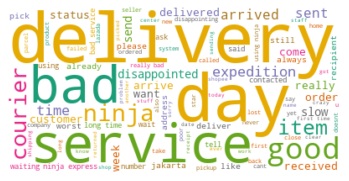

In [354]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

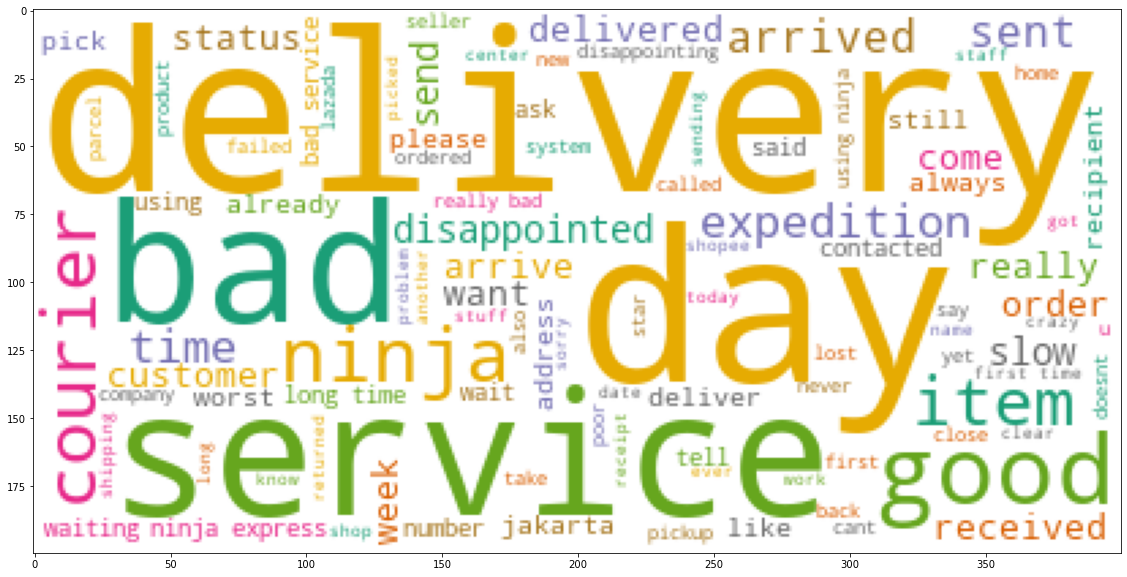

In [355]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [366]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['clean_2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'clean_2':'Late reviews'})

In [368]:
df_late.to_csv('Late_reviews_ninjath.csv')